In [23]:
import sys
from pathlib import Path

# Ensure PyVRP is used from the installed environment, not the local clone.
# ROOT = Path().resolve()
# sys.path.insert(0, str(ROOT / "libs" / "pyvrp"))

import matplotlib.pyplot as plt
from pyvrp import read, Solution, GeneticAlgorithm, RandomNumberGenerator, PenaltyManager, Population, PopulationParams, SolveParams
import pyvrp.diversity as diversity
from pyvrp.plotting import plot_result

from pyvrp.stop import MaxRuntime, MaxIterations, NoImprovement
from pyvrp.search import LocalSearch

from pathlib import Path
import os

from utils import run_pyvrp

In [24]:
# Experiment settings - change if needed
instance_path = 'instances/Leuven2.vrp'
seed = 0
TIME_LIMIT = 10*60  # seconds per run (MaxRuntime)
time_limit = TIME_LIMIT      # TODO: remove when actually running experiments
results_dir = Path('results')
os.makedirs(results_dir, exist_ok=True)
results_csv = results_dir / 'experiments.csv'

def run_config(const_heuristic, intensify, diversify, seed, time_limit=TIME_LIMIT):
    stop = MaxRuntime(time_limit)
    #stop = NoImprovement(00)  # TODO: change when actually running experiments?
    initial_sol = const_heuristic(instance_path) if const_heuristic is not None else None
    res = run_pyvrp(instance_path, stop, seed=seed, initial_solution=initial_sol, intensify=intensify, diversify=diversify)
    return res

In [25]:
# Define the 4 configurations and run them
configs = [
    ('both', None, True, True),
    ('intensify_only', None, True, False),
    ('diversify_only', None, False, True),
    ('none', None, False, False),
]

instance = read(instance_path, round_func="round")
benchmark = 111391.00


_, ax = plt.subplots(figsize=(8, 8))
plot_coordinates(instance, ax=ax)
plt.tight_layout()

# Intensification + Diversification

In [26]:
name, const_heuristic, intensify, diversify = configs[0]
result = run_config(const_heuristic, intensify, diversify, seed, time_limit)
print(result)

Solution results
    # routes: 46
     # trips: 46
   # clients: 4000
   objective: 118382
    distance: 118382
    duration: 118382
# iterations: 509
    run-time: 601.39 seconds

Routes
------
Route #1: 153 1919 241 446 813 947 2358 2400 2563 3099 2595 1260 2792 2036 2825 3792 3834 1461 85 3285 1214 2160 3741 480 1417 407 245 1145 3137 745 2234 1900 1386 2854 3930 3157 919 2646 1120 1988 1882 2882 3768 2644 1088 1176 3375 1732 3013 344 1993 521 3794 1056 2228 2243 3331 1505 3501 2125 2998 2995 970 1469 1864 1729 592 2113 3711 2752 1808 1804 3742
Route #2: 376 1636 3575 2841 3987 2438 2805 2493 586 773 1978 1680 2583 688 775 3202 934 527 264 1215 2528 3380 2415 294 187 716 901 133 3204 864 2858 504 1743 2758 3135 1209 1550 2883 3276 649 2905 3783 1991 1233 3891 1212 1902 2213 3474 1490 1996 328 976 2086 2278 2004 1443 1829 2144 2992 4000 2952 1327 3878 1402 2376 780 276 537 3522 2475 2715 2236 998 469 929 2371 1491 1824 2673 1800 3500 26 3890 1642 2095 894
Route #3: 273 2692 2315 1616

Found a solution with cost: 118382.
This is 6.3% worse than the best known solution, which is 111391.0.


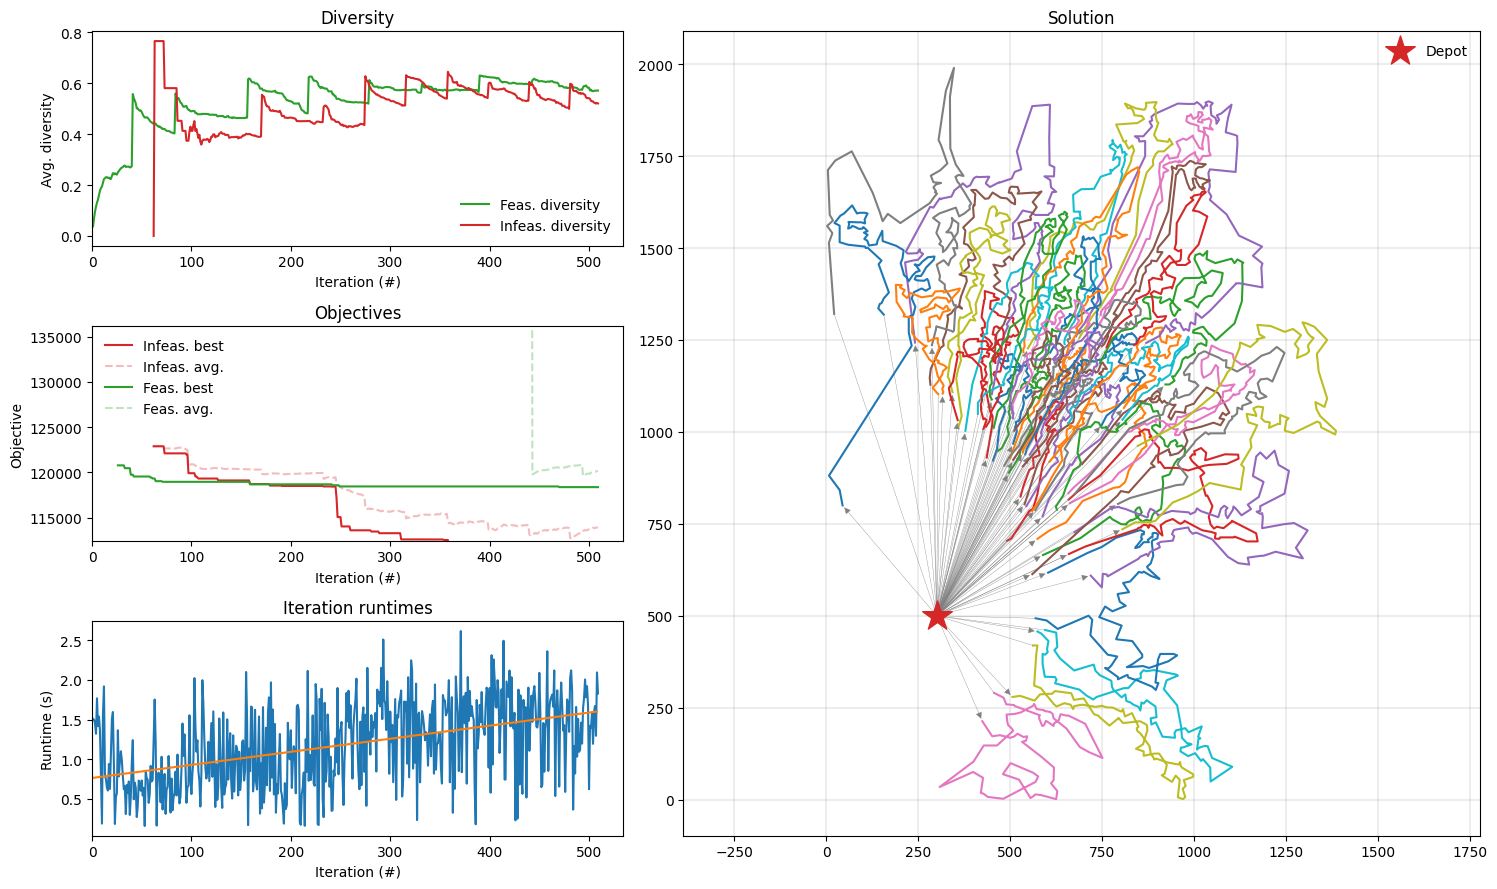

In [27]:
gap = 100 * (result.cost() - benchmark) / benchmark
print(f"Found a solution with cost: {result.cost()}.")
print(f"This is {gap:.1f}% worse than the best known", end=" ")
print(f"solution, which is {benchmark}.")

fig = plt.figure(figsize=(15, 9))
plot_result(result, instance, fig)
fig.tight_layout()

# Intensification only

In [28]:
name, const_heuristic, intensify, diversify = configs[1]
result = run_config(const_heuristic, intensify, diversify, seed, time_limit)
print(result)

Solution results
    # routes: 46
     # trips: 46
   # clients: 4000
   objective: 117969
    distance: 117969
    duration: 117969
# iterations: 504
    run-time: 601.13 seconds

Routes
------
Route #1: 2166 1808 2752 3711 2363 2626 2125 3501 3036 2568 277 1993 344 2548 1417 1145 245 407 881 2979 3854 2560 1689 1516 3881 419 2846 1493 1211 3518 1247 1038 3457 3207 1770 3965 914 1883 545 1221 3113 2497 580 3120 3206 3927 3874 1148 820 2629 565 2298 1663 1131 3808 989 1583 1884 437 709 3799 1453 1872 359 1861 2436 724 400 3205 1250 2098 1177 3111 3153 3045 3140 2808 3274 1599 26 3890 2095 1919 153 324 3592
Route #2: 1805 1253 2184 93 3089 3195 256 1867 3464 1382 453 2183 1975 1120 2646 919 2035 2208 1610 2179 3781 1090 1495 2610 1258 804 1225 1584 920 232 2441 1020 1563 2921 166 1088 2644 3768 2882 1882 1988 2854 3930 2510 1561 3509 183 1045 970 1864 1729 2792 1461 85 3834 1846 106 1143 2063 1653 2624 2009 1002 122 1121 1214 60 337 2655 2272 3438 3687 1789 3164 3273 641 2212 3742
Route

Found a solution with cost: 117969.
This is 5.9% worse than the best known solution, which is 111391.0.


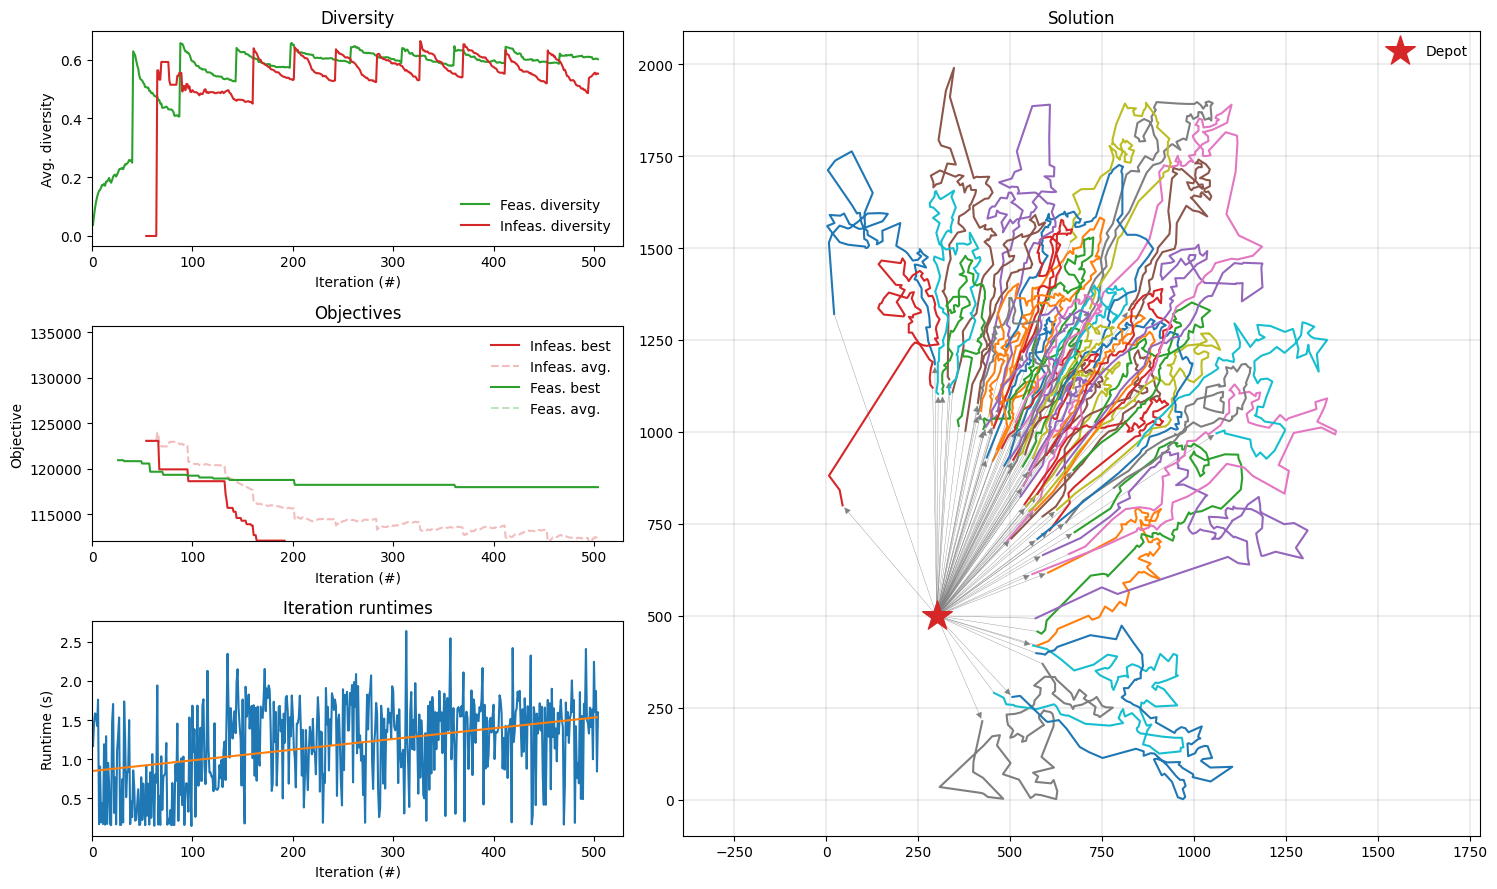

In [29]:
gap = 100 * (result.cost() - benchmark) / benchmark
print(f"Found a solution with cost: {result.cost()}.")
print(f"This is {gap:.1f}% worse than the best known", end=" ")
print(f"solution, which is {benchmark}.")

fig = plt.figure(figsize=(15, 9))
plot_result(result, instance, fig)
fig.tight_layout()

# Diversification only

In [30]:
name, const_heuristic, intensify, diversify = configs[2]
result = run_config(const_heuristic, intensify, diversify, seed, time_limit)
print(result)

Solution results
    # routes: 46
     # trips: 46
   # clients: 4000
   objective: 116444
    distance: 116444
    duration: 116444
# iterations: 1220
    run-time: 600.22 seconds

Routes
------
Route #1: 3334 1778 947 2563 3099 2595 2036 3834 1143 2063 1846 106 1261 1002 2009 3008 2052 1305 291 51 3980 3411 278 620 2330 1309 1872 1453 1593 2800 2607 152 2286 3526 2749 3631 1279 2034 2619 2933 3368 1904 2621 3188 1059 3681 1206 3514 3546 320 1099 1336 1754 801 419 3881 1736 1816 670 3876 792 359 2436 1861 1822 724 400 1190 3601 2266 633 2624 1653 619 917 2304 1092 1177 3218 1797 426 2808 3890 1642 2095 1406 818 894
Route #2: 3742 1804 1808 2752 3711 349 2797 2141 1483 840 2363 3732 2626 2995 2998 2125 3501 1056 3794 521 3013 745 3137 1145 407 245 2077 2979 3528 1302 2560 3854 1470 3217 257 2205 3467 2604 3105 2586 1258 467 2783 3543 1176 1571 3700 3375 1732 2234 2548 344 1993 277 2568 3036 3966 3738 337 85 1461 3687 1789 607 2665 3985 3959 2212
Route #3: 1616 1636 259 2072 495 1048 14

Found a solution with cost: 116444.
This is 4.5% worse than the best known solution, which is 111391.0.


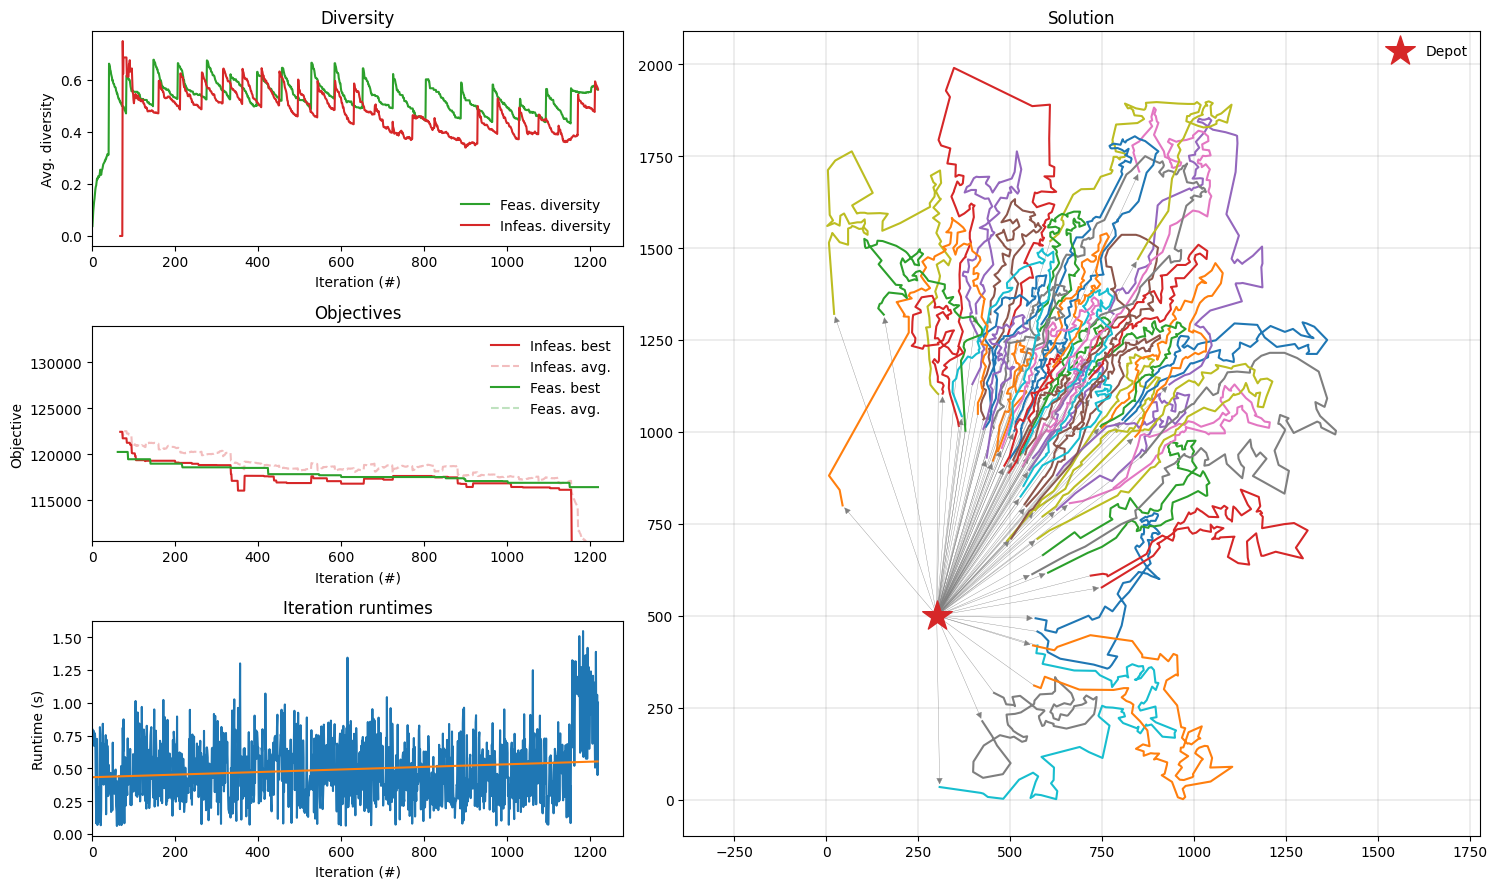

In [31]:
gap = 100 * (result.cost() - benchmark) / benchmark
print(f"Found a solution with cost: {result.cost()}.")
print(f"This is {gap:.1f}% worse than the best known", end=" ")
print(f"solution, which is {benchmark}.")

fig = plt.figure(figsize=(15, 9))
plot_result(result, instance, fig)
fig.tight_layout()

# No intensification and diversification

In [32]:
name, const_heuristic, intensify, diversify = configs[2]
result = run_config(const_heuristic, intensify, diversify, seed, time_limit)
print(result)

Solution results
    # routes: 46
     # trips: 46
   # clients: 4000
   objective: 116444
    distance: 116444
    duration: 116444
# iterations: 1235
    run-time: 600.47 seconds

Routes
------
Route #1: 3334 1778 947 2563 3099 2595 2036 3834 1143 2063 1846 106 1261 1002 2009 3008 2052 1305 291 51 3980 3411 278 620 2330 1309 1872 1453 1593 2800 2607 152 2286 3526 2749 3631 1279 2034 2619 2933 3368 1904 2621 3188 1059 3681 1206 3514 3546 320 1099 1336 1754 801 419 3881 1736 1816 670 3876 792 359 2436 1861 1822 724 400 1190 3601 2266 633 2624 1653 619 917 2304 1092 1177 3218 1797 426 2808 3890 1642 2095 1406 818 894
Route #2: 3742 1804 1808 2752 3711 349 2797 2141 1483 840 2363 3732 2626 2995 2998 2125 3501 1056 3794 521 3013 745 3137 1145 407 245 2077 2979 3528 1302 2560 3854 1470 3217 257 2205 3467 2604 3105 2586 1258 467 2783 3543 1176 1571 3700 3375 1732 2234 2548 344 1993 277 2568 3036 3966 3738 337 85 1461 3687 1789 607 2665 3985 3959 2212
Route #3: 1616 1636 259 2072 495 1048 14

Found a solution with cost: 116444.
This is 4.5% worse than the best known solution, which is 111391.0.


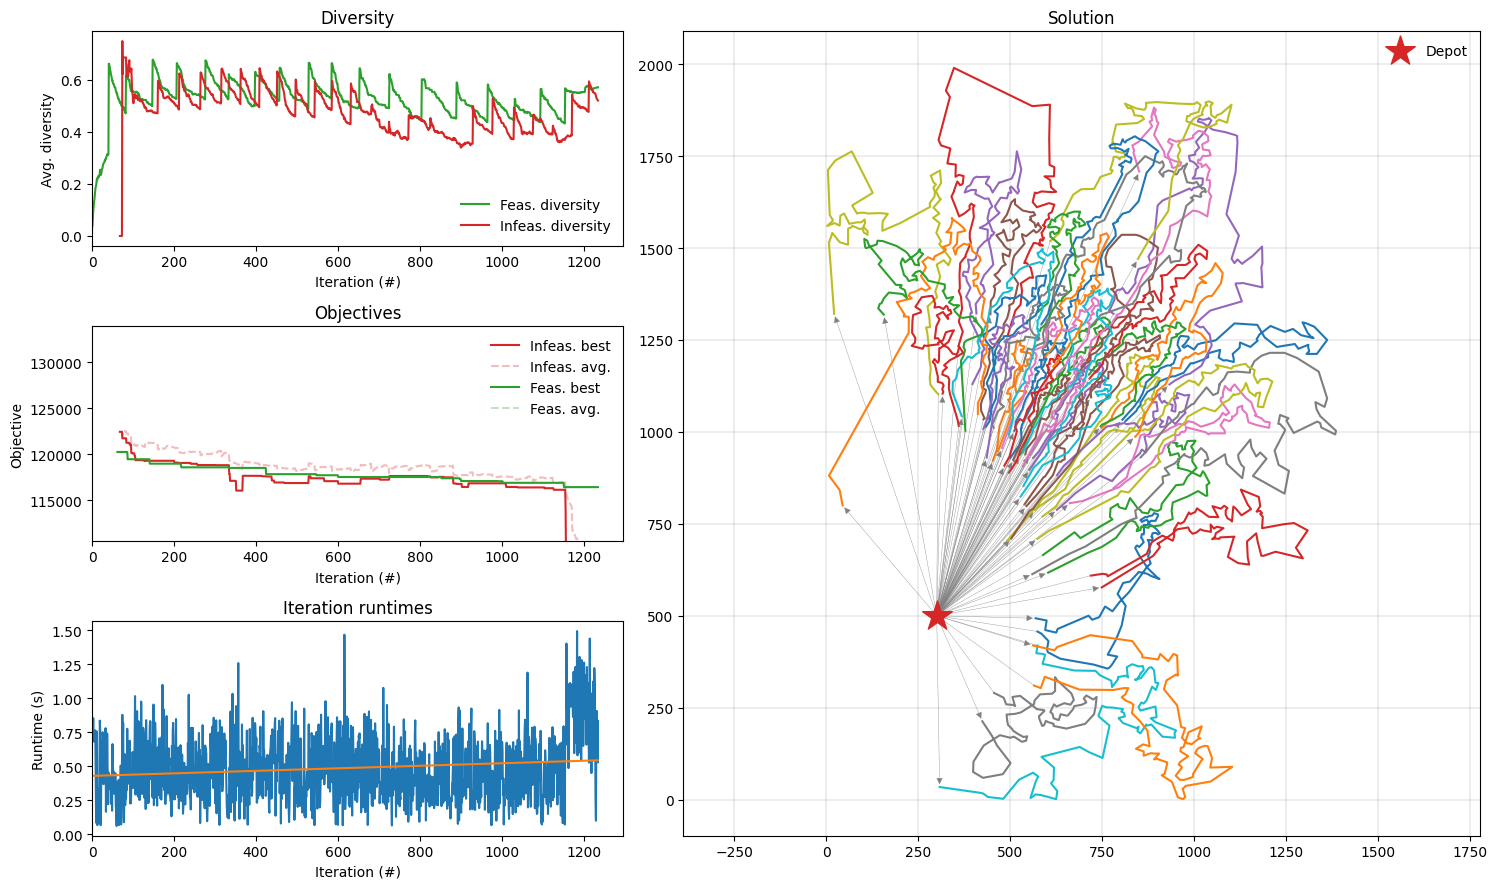

In [33]:
gap = 100 * (result.cost() - benchmark) / benchmark
print(f"Found a solution with cost: {result.cost()}.")
print(f"This is {gap:.1f}% worse than the best known", end=" ")
print(f"solution, which is {benchmark}.")

fig = plt.figure(figsize=(15, 9))
plot_result(result, instance, fig)
fig.tight_layout()